[View in Colaboratory](https://colab.research.google.com/github/tiensu/DATA_SCIENCE_PJ/blob/master/Web_Scraping.ipynb)

https://www.datacamp.com/community/tutorials/web-scraping-using-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [0]:
url = 'http://www.hubertiming.com/results/2017GPTR10K'
html = urlopen(url)
soup = BeautifulSoup(html, 'html')

In [14]:
""" Get data from website and convert it into a DataFrame"""
# Get the title
title = soup.title.text
print(title)

2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results


In [0]:
# Print out the text
text = soup.get_text()
#print(text)

In [20]:
# Get all link
all_links = soup.find_all('a')
for link in all_links:
  print(link.get('href'))
  

/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


In [32]:
# Get data from table
import re

# Get rows in table
rows = soup.find_all('tr')
rowsData = []
#print(rows[:10])
for row in rows:
    cell = row.find_all('td')
    str_cell = str(cell)
    cleantext = BeautifulSoup(str_cell, "html").get_text()
    rowsData.append(cleantext)
print(rowsData)

['[Finishers:, 577]', '[Male:, 414]', '[Female:, 163]', '[]', '[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21, 05:51, 1 of 414, M 36-45, 1 of 152, 00:00:03, 00:36:24, ]', '[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, 00:36:42, 05:55, 2 of 414, M 26-35, 1 of 154, 00:00:03, 00:36:45, INTEL TEAM F]', '[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:37:44, 06:05, 3 of 414, M 46-55, 1 of 64, 00:00:04, 00:37:48, ]', '[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:34, 06:13, 4 of 414, M 36-45, 2 of 152, 00:00:03, 00:38:37, ]', '[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00:39:21, 06:20, 5 of 414, M 26-35, 2 of 154, 00:00:03, 00:39:24, INTEL TEAM F]', '[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39:49, 06:25, 6 of 414, M 18-25, 1 of 34, 00:00:06, 00:39:55, ]', '[7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 00:40:04, 06:27, 7 of 414, M 36-45, 3 of 152, 00:00:13, 00:40:17, ]', '[8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, 00:40:05, 06:27, 8 of 414, M 36-45, 4 of 152, 00:00:04, 00:40:09, ]', '[9, 7, 

In [33]:
# Convert the list into a dataframe
df = pd.DataFrame(rowsData)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


In [41]:
""" Data manipulation and cleaning"""
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [45]:
df1[0] = df1[0].str.strip('[')
df1[1] = df1[1].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [52]:
col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "html").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [55]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [56]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [57]:
df3[0] = df3[0].str.strip('[')
df3[13] = df3[13].str.strip(']')
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team


In [60]:
# Concatenate two frame into one
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None


In [75]:
# Assign the first row to be the table header
df5 = df4.rename(columns=df4.iloc[0])
df6 = df5.drop(df5.index[0])
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]


In [66]:
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 1 to 595
Data columns (total 14 columns):
Place               595 non-null object
 Bib                594 non-null object
 Name               592 non-null object
 Gender             592 non-null object
 City               592 non-null object
 State              592 non-null object
 Chip Time          592 non-null object
 Chip Pace          577 non-null object
 Gender Place       577 non-null object
 Age Group          577 non-null object
 Age Group Place    577 non-null object
 Time to Start      577 non-null object
 Gun Time           577 non-null object
 Team               577 non-null object
dtypes: object(14)
memory usage: 69.7+ KB


(595, 14)

In [84]:
# drop all rows with any missing values
df7 = df6.dropna(axis=0, how='any')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [0]:
# Remove space character in columns name
df7.columns.tolist()
df7.columns = [x.lstrip(' ') for x in df7.columns]

In [109]:
# removing the closing bracket for cells in the "Team" column
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Place,ib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [116]:
"""Data Analysis and Visualization"""

# First question: What was the average finish time (in minutes) for the runners?
time_list = df7['Chip Time'].tolist()

time_mins = []
for i in time_list:
  h, m, s = i.split(':')
  math = (int(h) * 3600 + int(m) * 60 + int(s))/60
  time_mins.append(math)  
df7['Runner_mins'] = time_mins
df7.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Place,ib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [121]:
# calculate statistics for numeric columns only
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


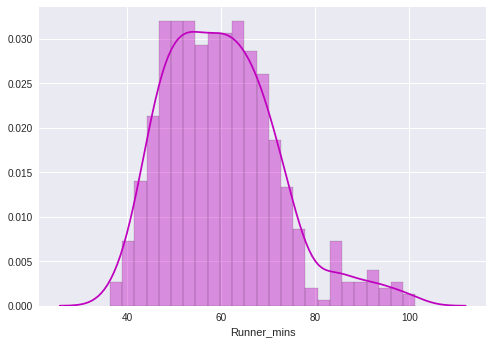

In [124]:
# Second question: Did the runners' finish times follow a normal distribution?
sns.distplot(df7.Runner_mins, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

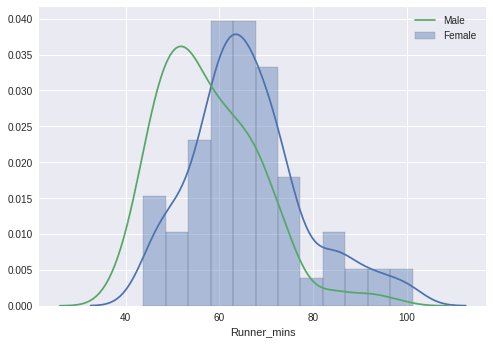

In [130]:
# Third question: Whether there were any performance differences between males and females of various age groups
f_fuko = df7[df7.Gender == ' F'].Runner_mins
m_fuko = df7[df7.Gender == ' M'].Runner_mins
sns.distplot(f_fuko, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')

In [132]:
# compute summary statistics for males and females separately
g_stats = df7.groupby("Gender", as_index=True).describe()
print(g_stats)

       Runner_mins                                                         \
             count       mean        std        min        25%        50%   
Gender                                                                      
 F           163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M           414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
 F      72.058333  101.300000  
 M      64.804167   98.516667  


In [134]:
# save data to csv file
output_file = df7.to_csv('./drive/My Drive/MACHINE_LEARNING_CODE/DATA_SET/runner_time.csv')

(577, 15)